# Excercise 1: AutoEncoder

**Encoder**

This transforms the input, x, into a low-dimensional latent vector

$z = f(x)$

Since the latent vector is of low dimension, the encoder is forced to learn only the most important features of the input data. 

**Decoder** 

This tries to recover the input from the latent vector

$g(z) = \hat{x}{~}$

**Loss Function**

$\mathcal{L}(x,\hat{x}{~})= \frac 1m\sum_{i=1}^m(y_i-\hat{y}_i)^2$

**Auto Encoder for denoising**

![denoising-ae](https://i.imgur.com/DU0lifD.png)


Use MSE (14'50'')

In [ ]:
from tensorflow.random import set_seed
set_seed(1612)
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(1612)
import matplotlib.pyplot as plt

## 1. Prepare Dataset

**Load Mnist Digits dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [ ]:
X_train.shape[1]

28

**Scale value**

In [ ]:
image_size = X_train.shape[1]
# TODO
#1. reshape to [size, height, width, channels]
#2. scale
X_train = np.reshape(X_train, [-1, image_size, image_size, 1]) # -1 là phần còn lại
X_test = np.reshape(X_test, [-1, image_size, image_size, 1]) # thêm 1 cuối để là hình trắng đen
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [ ]:
image_size

28

**Add noise**

In [ ]:
# generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=X_train.shape)
X_train_noisy = X_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=X_test.shape)
X_test_noisy = X_test + noise
# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
X_train_noisy = np.clip(X_train_noisy, 0., 1.) # clip là cắt 2 dầu: nào lớp hơn 1 (ko có nhỏ hơn 0 trong này) thì cắt bỏ đi
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [ ]:
print(X_train_noisy.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test_noisy.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


## 2. Visualize Data

target:  56471
Shape of X_train[target]:  (28, 28, 1)


Text(0.5, 1.0, 'Noisy image')

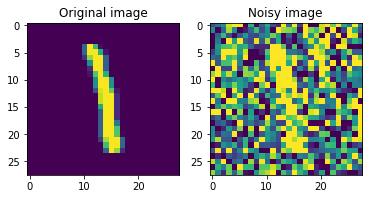

In [ ]:
# TODO
# 2 rows, one is orignal one is noisy
target = np.random.choice(np.where(y_train == 1)[0])
print('target: ', target)
X_train[target].shape
plt.subplot(1,2,1)
print('Shape of X_train[target]: ', X_train[target].shape)
plt.imshow(np.squeeze(X_train[target]))
plt.title('Original image')
plt.subplot(1,2,2)
X_train_noisy[target].shape
plt.imshow(np.squeeze(X_train_noisy[target]))
plt.title('Noisy image')

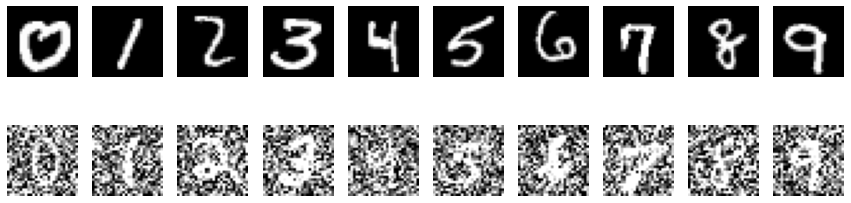

In [ ]:
fig, axs = plt.subplots(2,10, figsize=(15,4)) # 10 classes. Draw 2 photos/ class --> 2x10
# fig.set_figheight(15)
# fig.set_figwidth(15)
for i in range(2): 
  for j in range(10):
    target = np.random.choice(np.where(y_train == j)[0]) 
    axs[i][j].grid('off') 
    axs[i][j].axis('off')
    if i == 0:
        axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray') 
        #axs[i][j].set_title(class_names[i])
    else:
        axs[i][j].imshow(np.squeeze(X_train_noisy[target]), cmap='gray') 
        #axs[i][j].set_title(class_names[i])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 3. Model & Training

**Constanst**

In [ ]:
latent_dim = 16

**Build Encoder**

In [ ]:
# TODO
# def build_cnn_block(layer, filters, k_size):
#     layer = Conv2D(filters, k_size, padding='same', activation='relu')(layer) # padding mặc định trên hàm bao nhiều để padding vào trong hàm luôn, dòng này chỉ để padding=padding
#     layer = MaxPooling2D()(layer)
#     return layer

# def encoder(input_shape):
#     input = Input(shape=input_shape)
#     cov_block_1 = build_cnn_block(input, 32, 3)
#     cov_block_2 = build_cnn_block(input, 32, 3)
#     cov_block_3 = build_cnn_block(cov_block_2, 64, 3)
#     cov_block_4 = build_cnn_block(cov_block_3, 64, 3) 
#     dense = Flatten()(cov_block_4)
#     # dense = Dense(16, activation='relu')(dense)
#     # dense = Dropout(0.4)(dense)
#     output = Dense(16, activation='softmax')(dense)
#     model = Model(input, output)
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
#     return model

In [ ]:
# tuned_model = encoder(X_train.shape[1:])
# tuned_model.summary()

In [ ]:
# tuned_model_noisy = encoder(X_train.shape[1:])
# tuned_model_noisy.summary()

In [ ]:
# Input (28,28,1)
# 2 x Conv2D(32, 3)
# Maxpool
# 2 x Conv2D(64, 3)
# Maxpool --> shape: (7,7,64) <-- find feature map shape
# Flatten
# Dense(16)
inputs = Input(shape=X_train.shape[1:])
conv1 = Conv2D(32,3, padding='same', activation='relu')(inputs) # strides: trượt qua các ô
conv1_1 = Conv2D(32,3, padding='same', activation='relu')(conv1) 
maxpool1 = MaxPooling2D(pool_size=(2,2))(conv1_1)

conv2 = Conv2D(64,3, padding='same', activation='relu')(maxpool1)
conv2_1 = Conv2D(64,3, padding='same', activation='relu')(conv2)
maxpool2 = MaxPooling2D(pool_size=(2,2))(conv2_1)

# Lưu feature map lại để lát đi ngc lại
shape = K.int_shape(maxpool2) # K đc import từ đầu là các phép tính trong đó

# Flatten ra rồi chuyển xuống còn 16 = Z (latent vector embedding)
flat = Flatten()(maxpool2)
latent = Dense(latent_dim, name='latent_vector')(flat)

encoder = Model(inputs, latent, name='encoder')
encoder.summary() 

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0   

**Build Decoder**

In [ ]:
# TODO
# continued
# Dense(shape[0] * shape[1] * shape[2])
# ConvTranspose(64,3)
# ConvTranspose(32,3)
# ConvTranspose(1,3) --> bài này sẽ ra (28,28,1)
latent_inputs = Input(shape=(latent_dim), name='decoder_input') # để dấu phẩy sau latent_dim vẫn ko sao

# sigmoid: cắt về 0 1 thì coi chạy đc hay ko, hay phải dùng linear (KO PHẢI CLASSIFICATION)
# use the shape (7, 7, 64) that was said earlier
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs) # shape ?
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Stack of Conv2DTranspose(64) - Conv2DTranspose(32)
x = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
x = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)

# Reconstruct input (without noise)
outputs = Conv2DTranspose(1, 3,
                          padding='same',
                          activation='sigmoid',
                          name='decoder_output')(x)
                          
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 3136)              53312     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         289       
Total params: 108,993
Trainable params: 108,993
Non-trainable params: 0
_____________________________________________________

**Build AutoEncoder**

In [ ]:
# TODO
# inputs = từ Encoder
# ouput = decoder(encoder(inputs))
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                115184    
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         108993    
Total params: 224,177
Trainable params: 224,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Shape of X_train_noisy: ', X_train_noisy.shape)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test_noisy: ', X_test_noisy.shape)
print('Shape of X_test: ', X_test.shape)   

Shape of X_train_noisy:  (60000, 28, 28, 1)
Shape of X_train:  (60000, 28, 28, 1)
Shape of X_test_noisy:  (10000, 28, 28, 1)
Shape of X_test:  (10000, 28, 28, 1)


**Training**

In [ ]:
# TODO
# MSE loss function, Adam optimize (vì là bài toán regression nên dùng MSE)
# Accuracy là cho Classification nhưng bài này ko classify gì hết
autoencoder.compile(loss='mse', optimizer='adam')
# train the AutoEncoder
autoencoder.fit(X_train_noisy,
                X_train,
                validation_data=(X_test_noisy, X_test),
                epochs=10,
                batch_size=512) # history = autoencoder.fit...

Epoch 1/10
118/118 [==============================] - 5s 45ms/step - loss: 0.0776 - val_loss: 0.0676
Epoch 2/10
118/118 [==============================] - 5s 41ms/step - loss: 0.0668 - val_loss: 0.0651
Epoch 3/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0560 - val_loss: 0.0406
Epoch 4/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0333 - val_loss: 0.0268
Epoch 5/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0247 - val_loss: 0.0227
Epoch 6/10
118/118 [==============================] - 5s 43ms/step - loss: 0.0214 - val_loss: 0.0202
Epoch 7/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0197 - val_loss: 0.0189
Epoch 8/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0187 - val_loss: 0.0182
Epoch 9/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 10/10
118/118 [==============================] - 5s 42ms/step - loss: 0.0175 - val_lo

**Learning Curve**

In [ ]:
# train ít quá nên ko cần vẽ

## Inference

**Predict**

In [ ]:
# TODO
y_pred = autoencoder.predict(X_test)
print('y_pred shape: ', y_pred.shape)
#print(y_pred)

y_pred shape:  (10000, 28, 28, 1)


**Show reconstructed image**

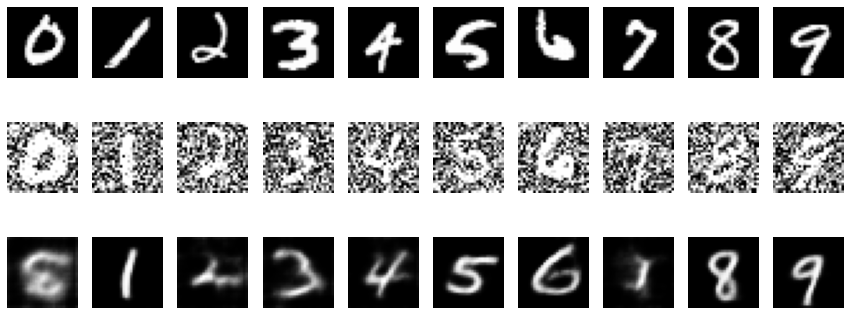

In [ ]:
# TODO
# like above plot
# 3rd row is reconstructed
fig, axs = plt.subplots(3,10, figsize=(15,6)) # 10 classes. Draw 2 photos/ class --> 2x10
# fig.set_figheight(15)
# fig.set_figwidth(15)
for i in range(3): 
  for j in range(10):
    target = np.random.choice(np.where(y_test == j)[0]) 
    axs[i][j].grid('off') 
    axs[i][j].axis('off')
    if i == 0:
        axs[i][j].imshow(np.squeeze(X_test[target]), cmap='gray') 
        #axs[i][j].set_title(class_names[i])
    elif i == 1:
        axs[i][j].imshow(np.squeeze(X_test_noisy[target]), cmap='gray') # cộng nhiễu rồi cắt đầu clip nên pred show ra (vẽ ra) hình hơi khác (vẫn nhận ra đc)
    else:
        axs[i][j].imshow(np.squeeze(y_pred[target]), cmap='gray') 
        #axs[i][j].set_title(class_names[i])

# Excercise 2: Semantic Segmentation (nâng cấp so với phần trên)

Encoder và Decoder nhiều layer hơn so vs phần trên

**Goal**
- Try to predict "where is a hand" in each image of ASL dataset
- Use semantic segmantation method – Predict label for each pixel in a image 
 - 0: background
 - 1: hand

**UNet**
![](https://i.imgur.com/GiRvS5h.png)

Skip connection ở đây là concat ko phải cộng. Concat thì phải cùng shape width height mới gộp đc. Hình ở trên thì copy and crop.

1024 sang 512 thì để Conv(1, 1) để giảm params.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Prepare Dataset

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/AI Practitioner - 2020/Files/asl.zip' -d '/'

Archive:  /content/drive/My Drive/Colab Notebooks/AI Practitioner - 2020/Files/asl.zip
  inflating: /cotai/test_mask.pkl    
  inflating: /cotai/val_mask.pkl     
  inflating: /cotai/test_img.pkl     
  inflating: /cotai/val_img.pkl      
  inflating: /cotai/train_mask.pkl   
  inflating: /cotai/train_img.pkl    


In [ ]:
# TODO
import pickle              # import module first
def load_data(path):
  file = open(path, 'rb')
  # get infor from that file
  data = pickle.load(file)
  # close file
  file.close()
  # return data
  return data

# call load_data here
train_img = load_data('/cotai/train_img.pkl')
val_img = load_data('/cotai/val_img.pkl')
test_img = load_data('/cotai/test_img.pkl')
train_mask = load_data('/cotai/train_mask.pkl')
val_mask = load_data('/cotai/val_mask.pkl')
test_mask = load_data('/cotai/test_mask.pkl')

**Checkout shape**

In [ ]:
# TODO
print('train_img shape: ', train_img.shape)
print('val_img shape: ', val_img.shape)
print('test_img shape: ', test_img.shape)
print('train_mask shape: ', train_mask.shape)
print('val_mask shape: ', val_mask.shape)
print('test_mask shape: ', test_mask.shape)

train_img shape:  (11425, 140, 100, 3)
val_img shape:  (2276, 140, 100, 3)
test_img shape:  (1551, 140, 100, 3)
train_mask shape:  (11425, 140, 100)
val_mask shape:  (2276, 140, 100)
test_mask shape:  (1551, 140, 100)


**Scale**

In [ ]:
# TODO
train_img = train_img.astype(np.float32) / 255
val_img = val_img.astype(np.float32) / 255
test_img = test_img.astype(np.float32) / 255
train_mask = train_mask.astype(np.float32) / 255
val_mask = val_mask.astype(np.float32) / 255
test_mask = test_mask.astype(np.float32) / 255

## Visualize Data

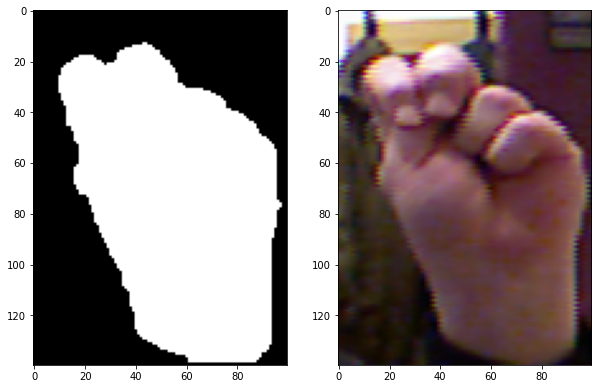

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(train_mask[100], cmap='gray')
ax2.imshow(train_img[100], cmap='gray')
plt.show()

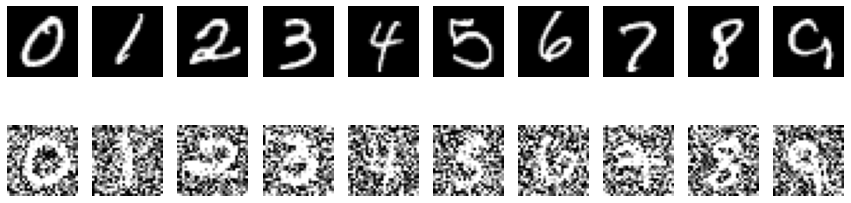

In [ ]:
# TODO --> Rewrite code
fig, axs = plt.subplots(2,10, figsize=(15,4)) # 10 classes. Draw 2 photos/ class --> 2x10
# fig.set_figheight(15)
# fig.set_figwidth(15)
for i in range(2): 
  for j in range(10):
    target = np.random.choice(np.where(y_train == j)[0]) 
    axs[i][j].grid('off') 
    axs[i][j].axis('off')
    if i == 0:
        axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray') 
        #axs[i][j].set_title(class_names[i])
    else:
        axs[i][j].imshow(np.squeeze(X_train_noisy[target]), cmap='gray') 
        #axs[i][j].set_title(class_names[i])

## Model & Training

In [ ]:
# Left side: Encoder
def build_cnn_block(x, filters): # x là layer trc, filter là array trong Conv(32,3)
  for filter in filters:
    x = Conv2D(filter, 3, activation='relu', padding='same', kernel_initializer='he_uniform')(x) # lấy 3 thôi thì filters cũng v
  return x
def Unet_model(input, classes = 1): # Simple Unet 

  block_1 = build_cnn_block(input, [16,16]) # 140-100-16 # để 16 16 thị tự động 2 layer Conv
  block_p1 = MaxPool2D()(block_1) # 70-50-16 # chắt 1/2 lại cái shape

  block_2 = build_cnn_block(block_p1, [32,32])  #70-50-32
  block_p2 = MaxPool2D()(block_2) #35-25-32

  block_3 = build_cnn_block(block_p2, [64,64])  #35-25-64
  block_p3 = MaxPool2D()(block_3) #17-12-64

  block_4 = build_cnn_block(block_p3, [128,128]) #17-12-128
  block_p4 = MaxPool2D()(block_4) #8-6-128

  block_5 = build_cnn_block(block_p4, [256,256]) #8-6-256 # last step upon own decision


  # Upsampling: quét qua thì hình to lên lại # nhân đôi 
  upsample_4 = Conv2DTranspose(128,3, strides = 2, padding='valid')(block_5) #17-13-128 # ko có padding thì tăng 2 (thêm viền 2 đầu) (thay vi 16-12)
  upsample_4 = Cropping2D(cropping=((0,0), (0,1)))(upsample_4) #17-12-128 # crop trên dưới trái phải ---> 1: bỏ đi 1 cột bên phải. Hình vuông thì tiện hơn. Bài này hình chữ nhật
  upsample_4 = Concatenate(axis = 3)([upsample_4, block_4]) # 17-12-128 + 17-12-128 # do giống width, height nên concat theo channel (3rd dimension): 128+128=256

  block_6 = build_cnn_block(upsample_4, [128,128]) # 17-12-256

  # Block 6 đi qua 2 Conv2D bình thường rồi nhân đôi lên
  upsample_3 = Conv2DTranspose(64, 3, strides = 2, padding='valid')(block_6) # 35-25-512 # cộng thêm viền 1 bên (auto viền 2 bên) cho 34-24-512
  upsample_3 = Concatenate(axis = 3)([upsample_3, block_3])

  block_7 = build_cnn_block(upsample_3, [64,64])

  upsample_2 = Conv2DTranspose(32, 3, strides = 2, padding = 'valid')(block_7)
  upsample_2 = Cropping2D(cropping=((0,1),(0,1)))(upsample_2) # số ko đẹp (ko giống width, height) thì crop để concat
  upsample_2 = Concatenate(axis = 3)([upsample_2, block_2])

  block_8 = build_cnn_block(upsample_2, [32,32])

  upsample_1 = Conv2DTranspose(16, 3, strides = 2, padding = 'valid')(block_8)
  upsample_1 = Cropping2D(cropping=((0,1),(0,1)))(upsample_1)
  upsample_1 = Concatenate(axis = 3)([upsample_1, block_1]) #140-100-32

  block_9 = build_cnn_block(upsample_1, [16,16]) #140-100-16

  output = Conv2D(1,1,activation = 'sigmoid', padding = 'same')(block_9) # cuối: giảm 16 xuống 1 và chỉ thành 1D (1 thì ít params lại)
  model = Model(inputs = input, outputs = output)
  #model.summary()
  return model
model = Unet_model(Input((140,100,3)))

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 140, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 140, 100, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 140, 100, 16) 2320        conv2d_4[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 70, 50, 16)   0           conv2d_5[0][0]                   
_______________________________________________________________________________________

**Custom metrics (mIoU)**

Ko dùng accuracy vì accu thì lủng lỗ

IoU là phần giao do tạo 1 mảng vuông đè hình (Intersection: sum các điểm lại là 2. Do đè lên nhau thì chỗ đè 6x6 mà 2 hình 8x8=64 CỘNG LẠI thì ra 128 rồi trừ đi 1 intersection). Hợp là ko giao (Union. Phần ngoài vẫn là các điểm 1). 

I/U * (1/mean); mean của IoU

Segmentation thì ko giống bounding box (ko xài accu).

In [ ]:
def mIoU(y_true, y_pred):
  y_pred = K.cast(K.greater(y_pred, .5), dtype='float32') # .5 is the threshold # cast là threshold (do cuối là sigmoid return prob từ 0-1 thì cast ~ điểm >0.5 thành 1)
  intersection = K.sum(y_true * y_pred, axis=[0, -1, -2]) # để quay lại thành 8x8=64 # tại sao axis 0 -1 -2 ?? --> google
  sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])
  jac = (intersection) / (sum_ - intersection ) # trừ đi intersection as explained above
  return K.mean(jac) 

**Compile and Train**

In [ ]:
# TODO
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', mIoU])
history = model.fit(train_img, train_mask, epochs=5, verbose=1, batch_size=64, validation_data=(val_img, val_mask))

Epoch 1/5
179/179 [==============================] - 24s 135ms/step - loss: 0.2202 - accuracy: 0.9047 - mIoU: 0.8086 - val_loss: 0.0886 - val_accuracy: 0.9661 - val_mIoU: 0.9233
Epoch 2/5
179/179 [==============================] - 23s 129ms/step - loss: 0.0762 - accuracy: 0.9701 - mIoU: 0.9332 - val_loss: 0.0666 - val_accuracy: 0.9735 - val_mIoU: 0.9400
Epoch 3/5
179/179 [==============================] - 23s 130ms/step - loss: 0.0641 - accuracy: 0.9744 - mIoU: 0.9426 - val_loss: 0.0627 - val_accuracy: 0.9751 - val_mIoU: 0.9438
Epoch 4/5
179/179 [==============================] - 24s 132ms/step - loss: 0.0591 - accuracy: 0.9763 - mIoU: 0.9467 - val_loss: 0.0605 - val_accuracy: 0.9762 - val_mIoU: 0.9459
Epoch 5/5
179/179 [==============================] - 24s 133ms/step - loss: 0.0566 - accuracy: 0.9772 - mIoU: 0.9486 - val_loss: 0.0562 - val_accuracy: 0.9774 - val_mIoU: 0.9487


**Learning Curve**

In [ ]:
# TODO


## Inference

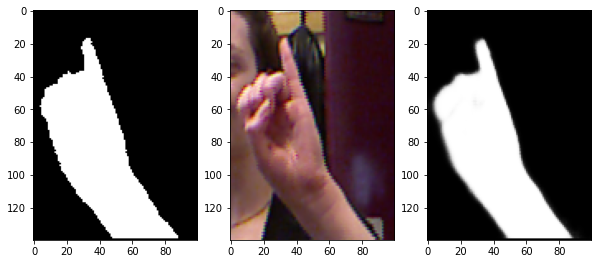

In [ ]:
# TODO:
# Method 1: lấy ra 1 tấm hình rồi mới predict
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(test_mask[100], cmap='gray')
ax2.imshow(test_img[100])
tmp = test_img[100]
tmp = tmp[None, ...]
ax3.imshow(np.squeeze(model.predict(tmp)), cmap='gray')

In [ ]:
# TODO: 
# Method 2: predict all photos
y_pred = model.predict(test_img)
print('y_pred shape: ', y_pred.shape)

y_pred shape:  (1551, 140, 100, 1)


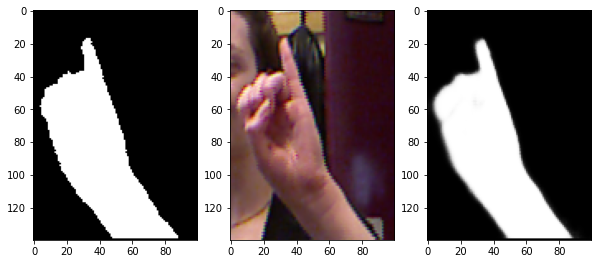

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(test_mask[100], cmap='gray')
ax2.imshow(test_img[100])
ax3.imshow(np.squeeze(y_pred[100]), cmap='gray')
plt.show()